In [154]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"/home/bradvurt/Загрузки/2. Cup_IT_2022_Датасет_Data_Science.csv")
df

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,rto_stddev_12_Сыры,rto_6_Крупы и зерновые,rto_stddev_7_Рыба и рыбные изделия,rto_stddev_8_Овощи - Фрукты,rto_8_Рыба и рыбные изделия,rto_11_Сыры,cnt_checks_8_Сыры,cnt_checks_8,rto_stddev_9_Мясная гастрономия,rto_stddev_12_Крупы и зерновые
0,0,0,NaN,300.021342,2418.116714,853.016746,NaN,5092.170392,3.0,NaN,...,73.846425,148.316558,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,1,0,1.0,519.031384,19899.211736,NaN,NaN,32392.636661,7.0,NaN,...,NaN,NaN,225.219998,301.404157,525.868862,1153.293331,7.0,21.0,NaN,NaN
2,2,0,NaN,131.165948,411.347689,NaN,NaN,1416.656061,NaN,NaN,...,NaN,NaN,NaN,6.651813,NaN,NaN,NaN,5.0,NaN,NaN
3,3,0,2.0,NaN,35043.643030,NaN,NaN,8460.544337,7.0,1425.707450,...,NaN,NaN,NaN,NaN,743.245025,NaN,NaN,4.0,104.784828,NaN
4,4,0,1.0,856.579037,8992.835847,NaN,NaN,4914.387768,14.0,663.142041,...,NaN,NaN,NaN,30.906907,NaN,533.725164,2.0,6.0,143.967128,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135056,135056,0,NaN,196.068192,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,97.138634,NaN,NaN,NaN,NaN
135057,135057,0,1.0,402.034438,NaN,638.046313,241.225584,NaN,3.0,109.331686,...,65.491622,NaN,NaN,NaN,NaN,197.113099,NaN,NaN,NaN,NaN
135058,135058,0,NaN,512.741089,NaN,283.611949,NaN,NaN,2.0,NaN,...,2.670624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135059,135059,0,NaN,124.425093,NaN,NaN,NaN,NaN,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy.stats import pearsonr
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import warnings

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from catboost import CatBoostClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

warnings.filterwarnings("ignore")
sns.set(context='notebook', style='whitegrid', palette='deep',
font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [156]:
a=list(df.columns)
a
for i in a:
    if "rto_11_" in i: print(i)

rto_11_Крупы и зерновые
rto_11_Мясная гастрономия
rto_11_Птица и изделия из птицы
rto_11_Рыба и рыбные изделия
rto_11_Овощи - Фрукты
rto_11_Сыры


In [157]:
df = df.loc[df['cnt_checks_6'] < 50]
df = df.loc[df['cnt_checks_7'] < 50]
df = df.loc[df['cnt_checks_8'] < 50]
df = df.loc[df['cnt_checks_9'] < 50]
df = df.loc[df['cnt_checks_10'] < 50]
df = df.loc[df['cnt_checks_11'] < 50]
df = df.loc[df['cnt_checks_12'] < 50]

In [158]:
df = df.fillna(0)
df

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,rto_stddev_12_Сыры,rto_6_Крупы и зерновые,rto_stddev_7_Рыба и рыбные изделия,rto_stddev_8_Овощи - Фрукты,rto_8_Рыба и рыбные изделия,rto_11_Сыры,cnt_checks_8_Сыры,cnt_checks_8,rto_stddev_9_Мясная гастрономия,rto_stddev_12_Крупы и зерновые
0,0,0,0.0,300.021342,2418.116714,853.016746,0.000000,5092.170392,3.0,0.000000,...,73.846425,148.316558,0.0,0.000000,0.000000,0.000000,0.0,5.0,0.000000,0.0
4,4,0,1.0,856.579037,8992.835847,0.000000,0.000000,4914.387768,14.0,663.142041,...,0.000000,0.000000,0.0,30.906907,0.000000,533.725164,2.0,6.0,143.967128,0.0
5,5,0,7.0,857.167292,11933.515863,1373.399681,1054.092634,10303.841003,11.0,2512.226929,...,69.455478,0.000000,0.0,58.166161,529.238757,2143.918194,5.0,9.0,52.899882,0.0
6,6,0,3.0,525.170598,9326.929213,574.845297,221.761891,7546.807577,18.0,688.440938,...,60.693862,0.000000,0.0,75.974148,0.000000,458.711011,2.0,15.0,112.494544,0.0
7,7,0,1.0,732.849943,3882.067435,0.000000,0.000000,4244.038472,5.0,850.488452,...,0.000000,0.000000,0.0,27.207030,0.000000,422.350400,1.0,6.0,122.710517,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132305,132305,0,1.0,0.000000,1679.869994,978.178244,169.615131,8924.675760,1.0,0.000000,...,55.073104,0.000000,0.0,42.451918,401.020637,184.670656,4.0,7.0,0.000000,0.0
132306,132306,0,2.0,686.411080,1364.351736,193.270633,0.000000,2111.994377,5.0,298.196866,...,0.000000,0.000000,0.0,0.000000,0.000000,323.838489,2.0,4.0,0.000000,0.0
132309,132309,0,0.0,201.178293,482.303886,0.000000,0.000000,1716.652217,5.0,0.000000,...,0.000000,0.000000,0.0,20.348105,0.000000,0.000000,0.0,7.0,0.000000,0.0
132310,132310,0,0.0,0.000000,272.912017,0.000000,0.000000,1808.530157,1.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,4.0,0.000000,0.0


In [159]:
#df["max_rto_Овощи - Фрукты"] = df[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]].max(axis=1)
#df["max_cnt_checks_Овощи - Фрукты"] = df[["cnt_checks_6_Овощи - Фрукты", "cnt_checks_7_Овощи - Фрукты", "cnt_checks_8_Овощи - Фрукты", "cnt_checks_9_Овощи - Фрукты", "cnt_checks_10_Овощи - Фрукты", "cnt_checks_11_Овощи - Фрукты", "cnt_checks_12_Овощи - Фрукты"]].max(axis=1)
df["mean_rto_Овощи - Фрукты"] = df[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]].mean(axis=1)
df["mean_cnt_checks_Овощи - Фрукты"] = df[["cnt_checks_6_Овощи - Фрукты", "cnt_checks_7_Овощи - Фрукты", "cnt_checks_8_Овощи - Фрукты", "cnt_checks_9_Овощи - Фрукты", "cnt_checks_10_Овощи - Фрукты", "cnt_checks_11_Овощи - Фрукты", "cnt_checks_12_Овощи - Фрукты"]].mean(axis=1)

In [160]:
#df["max_cnt_checks"] = df[["cnt_checks_6", "cnt_checks_7", "cnt_checks_8", "cnt_checks_9", "cnt_checks_10", "cnt_checks_11", "cnt_checks_12"]].max(axis=1)
df["mean_rto"] = df[["rto_6", "rto_7", "rto_8", "rto_9", "rto_10", "rto_11", "rto_12"]].mean(axis=1)
df["mean_cnt_checks"] = df[["cnt_checks_6", "cnt_checks_7", "cnt_checks_8", "cnt_checks_9", "cnt_checks_10", "cnt_checks_11", "cnt_checks_12"]].mean(axis=1)

In [161]:
#df[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты", "max_rto"]]

<AxesSubplot:>

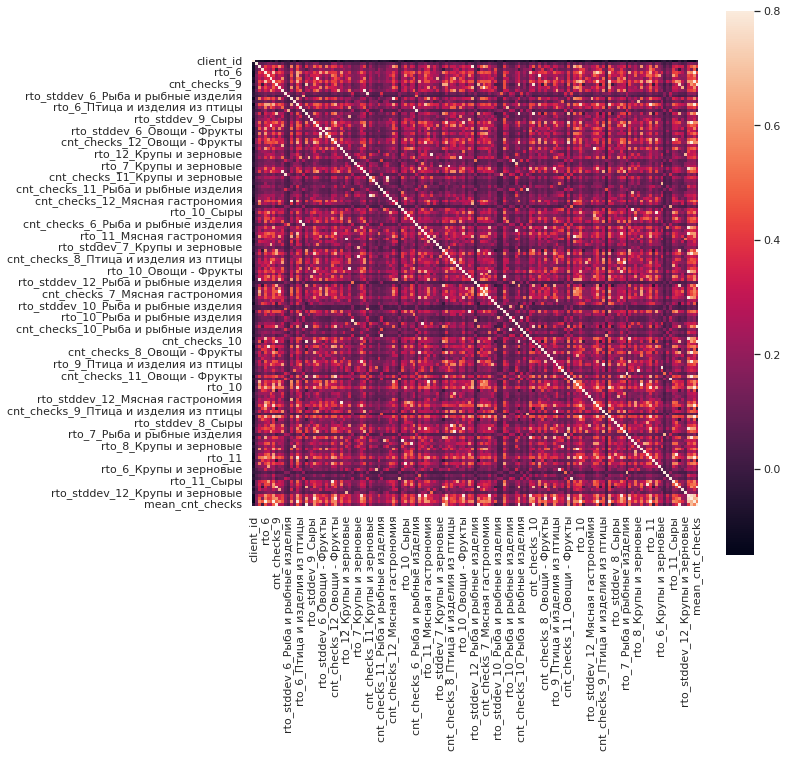

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns


corrmat = df.corr()

f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [163]:
k = 15

cols = corrmat.nlargest(k, "is_in_club")
cols

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,rto_8_Рыба и рыбные изделия,rto_11_Сыры,cnt_checks_8_Сыры,cnt_checks_8,rto_stddev_9_Мясная гастрономия,rto_stddev_12_Крупы и зерновые,mean_rto_Овощи - Фрукты,mean_cnt_checks_Овощи - Фрукты,mean_rto,mean_cnt_checks
is_in_club,-0.075202,1.000000,0.092459,0.078494,0.105972,0.154783,0.131311,0.116741,0.103140,0.062555,...,0.026744,0.149386,0.140380,0.092847,0.050181,0.069885,0.164664,0.186129,0.151004,0.128308
cnt_checks_12_Овощи - Фрукты,-0.130418,0.191827,0.401879,0.146809,0.404456,0.457998,0.454486,0.424283,0.474138,0.301628,...,0.097125,0.371708,0.379181,0.414457,0.187468,0.204894,0.630703,0.823952,0.570547,0.579998
mean_cnt_checks_Овощи - Фрукты,-0.129590,0.186129,0.469179,0.159444,0.548357,0.393729,0.411466,0.564914,0.595545,0.360096,...,0.120372,0.405078,0.497733,0.567460,0.221295,0.178407,0.758519,1.000000,0.660874,0.684527
cnt_checks_11_Овощи - Фрукты,-0.116952,0.180923,0.412959,0.177603,0.403424,0.359180,0.376945,0.427556,0.486702,0.300826,...,0.100771,0.451186,0.388177,0.425903,0.184824,0.163980,0.636693,0.844342,0.565249,0.586748
cnt_checks_12_Сыры,-0.128073,0.176908,0.406626,0.207781,0.395072,0.816418,0.398074,0.412577,0.319093,0.326688,...,0.084776,0.551476,0.514911,0.277942,0.204049,0.171793,0.440568,0.513870,0.547088,0.392083
cnt_checks_11_Сыры,-0.119576,0.171438,0.419322,0.265644,0.399953,0.537452,0.323702,0.424149,0.327841,0.334998,...,0.091228,0.827190,0.535041,0.284814,0.203715,0.137588,0.445184,0.519986,0.549661,0.395299
mean_rto_Овощи - Фрукты,-0.122189,0.164664,0.362678,0.349167,0.602767,0.450406,0.407969,0.598795,0.334231,0.362192,...,0.163715,0.456153,0.421565,0.312369,0.233788,0.201175,1.000000,0.758519,0.713389,0.388416
cnt_checks_10_Овощи - Фрукты,-0.106304,0.159555,0.493850,0.140676,0.416943,0.331359,0.354274,0.447934,0.509666,0.312644,...,0.098524,0.350831,0.399938,0.437827,0.191980,0.151208,0.652996,0.858360,0.567365,0.578627
rto_12_Овощи - Фрукты,-0.117941,0.157870,0.304338,0.310321,0.445506,0.504537,0.431813,0.453029,0.251386,0.303016,...,0.127987,0.399458,0.318428,0.212102,0.198334,0.222871,0.824104,0.599448,0.607709,0.313151
cnt_checks_10_Сыры,-0.114741,0.157455,0.533719,0.211945,0.411337,0.505094,0.311320,0.436778,0.343920,0.349576,...,0.089772,0.545383,0.559811,0.291453,0.213493,0.131855,0.441962,0.516389,0.552365,0.393038


In [164]:
df["cor_6"] = df["rto_6_Овощи - Фрукты"]
df["cor_7"] = df["rto_7_Овощи - Фрукты"] * 1.0687
df["cor_8"] = df["rto_8_Овощи - Фрукты"] * 1.1526
df["cor_9"] = df["rto_9_Овощи - Фрукты"] * 1.1342
df["cor_10"] = df["rto_10_Овощи - Фрукты"] * 1.0477
df["cor_11"] = df["rto_11_Овощи - Фрукты"] * 1.0404
df["cor_12"] = df["rto_12_Овощи - Фрукты"] * 1.0049

In [165]:
df[["is_in_club", "cor_6", "cor_7", "cor_8", "cor_9", "cor_10", "cor_11", "cor_12"]].corr()

,is_in_club,cor_6,cor_7,cor_8,cor_9,cor_10,cor_11,cor_12
is_in_club,1.000000,0.116924,0.116342,0.117351,0.125392,0.137204,0.156176,0.157870
cor_6,0.116924,1.000000,0.658400,0.588916,0.570893,0.564052,0.553521,0.534083
cor_7,0.116342,0.658400,1.000000,0.643463,0.577575,0.554683,0.529776,0.498867
cor_8,0.117351,0.588916,0.643463,1.000000,0.677943,0.613708,0.572651,0.534690
cor_9,0.125392,0.570893,0.577575,0.677943,1.000000,0.709022,0.656755,0.603292
cor_10,0.137204,0.564052,0.554683,0.613708,0.709022,1.000000,0.741978,0.667846
cor_11,0.156176,0.553521,0.529776,0.572651,0.656755,0.741978,1.000000,0.733279
cor_12,0.157870,0.534083,0.498867,0.534690,0.603292,0.667846,0.733279,1.000000


In [166]:
#df["%cor_6"] = df["rto_6_Овощи - Фрукты"] / df["rto_6"]
#df["%cor_7"] = df["rto_7_Овощи - Фрукты"] * 1.0687 / (df["rto_7"] + 0.0687 * df["rto_7_Овощи - Фрукты"])
#df["%cor_8"] = df["rto_8_Овощи - Фрукты"] * 1.1526 / (df["rto_7"] + 0.1526 * df["rto_8_Овощи - Фрукты"])
#df["%cor_9"] = df["rto_9_Овощи - Фрукты"] * 1.1342 / (df["rto_7"] + 0.1342 * df["rto_9_Овощи - Фрукты"])
#df["%cor_10"] = df["rto_10_Овощи - Фрукты"] * 1.0477 / (df["rto_7"] + 0.0477 * df["rto_10_Овощи - Фрукты"])
#df["%cor_11"] = df["rto_11_Овощи - Фрукты"] * 1.0404 / (df["rto_7"] + 0.0404 * df["rto_11_Овощи - Фрукты"])
#df["%cor_12"] = df["rto_12_Овощи - Фрукты"] * 1.0049 / (df["rto_7"] + 0.0049 * df["rto_12_Овощи - Фрукты"])

In [167]:
#df[["is_in_club", "%cor_6", "%cor_7", "%cor_8", "%cor_9", "%cor_10", "%cor_11", "%cor_12", "rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]].corr()

In [168]:
corrmat = df.corr()

k = 20

cols = corrmat.nlargest(k, "is_in_club")
cols

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,mean_cnt_checks_Овощи - Фрукты,mean_rto,mean_cnt_checks,cor_6,cor_7,cor_8,cor_9,cor_10,cor_11,cor_12
is_in_club,-0.075202,1.000000,0.092459,0.078494,0.105972,0.154783,0.131311,0.116741,0.103140,0.062555,...,0.186129,0.151004,0.128308,0.116924,0.116342,0.117351,0.125392,0.137204,0.156176,0.157870
cnt_checks_12_Овощи - Фрукты,-0.130418,0.191827,0.401879,0.146809,0.404456,0.457998,0.454486,0.424283,0.474138,0.301628,...,0.823952,0.570547,0.579998,0.420661,0.418100,0.418717,0.470444,0.510562,0.564197,0.714422
mean_cnt_checks_Овощи - Фрукты,-0.129590,0.186129,0.469179,0.159444,0.548357,0.393729,0.411466,0.564914,0.595545,0.360096,...,1.000000,0.660874,0.684527,0.602959,0.619507,0.610938,0.630760,0.637310,0.634297,0.599448
cnt_checks_11_Овощи - Фрукты,-0.116952,0.180923,0.412959,0.177603,0.403424,0.359180,0.376945,0.427556,0.486702,0.300826,...,0.844342,0.565249,0.586748,0.427675,0.428047,0.435483,0.492764,0.544259,0.723537,0.542185
cnt_checks_12_Сыры,-0.128073,0.176908,0.406626,0.207781,0.395072,0.816418,0.398074,0.412577,0.319093,0.326688,...,0.513870,0.547088,0.392083,0.309553,0.291994,0.287570,0.323178,0.358996,0.399119,0.486475
cnt_checks_11_Сыры,-0.119576,0.171438,0.419322,0.265644,0.399953,0.537452,0.323702,0.424149,0.327841,0.334998,...,0.519986,0.549661,0.395299,0.314514,0.301039,0.302321,0.339430,0.378522,0.488439,0.385793
mean_rto_Овощи - Фрукты,-0.122189,0.164664,0.362678,0.349167,0.602767,0.450406,0.407969,0.598795,0.334231,0.362192,...,0.758519,0.713389,0.388416,0.785050,0.772881,0.791962,0.825357,0.851109,0.849591,0.824104
cnt_checks_10_Овощи - Фрукты,-0.106304,0.159555,0.493850,0.140676,0.416943,0.331359,0.354274,0.447934,0.509666,0.312644,...,0.858360,0.567365,0.578627,0.450158,0.460704,0.474739,0.545796,0.727144,0.561331,0.506055
cor_12,-0.117941,0.157870,0.304338,0.310321,0.445506,0.504537,0.431813,0.453029,0.251386,0.303016,...,0.599448,0.607709,0.313151,0.534083,0.498867,0.534690,0.603292,0.667846,0.733279,1.000000
rto_12_Овощи - Фрукты,-0.117941,0.157870,0.304338,0.310321,0.445506,0.504537,0.431813,0.453029,0.251386,0.303016,...,0.599448,0.607709,0.313151,0.534083,0.498867,0.534690,0.603292,0.667846,0.733279,1.000000


In [169]:
df["rto_7-6"] = df["rto_7_Овощи - Фрукты"] - df["rto_6_Овощи - Фрукты"]
df["rto_8-7"] = df["rto_8_Овощи - Фрукты"] - df["rto_7_Овощи - Фрукты"]
df["rto_9-8"] = df["rto_9_Овощи - Фрукты"] - df["rto_8_Овощи - Фрукты"]
df["rto_10-9"] = df["rto_10_Овощи - Фрукты"] - df["rto_9_Овощи - Фрукты"]
df["rto_11-10"] = df["rto_11_Овощи - Фрукты"] - df["rto_10_Овощи - Фрукты"]
df["rto_12-11"] = df["rto_12_Овощи - Фрукты"] - df["rto_11_Овощи - Фрукты"]

In [170]:
df[["is_in_club", "rto_7-6", "rto_8-7", "rto_9-8", "rto_10-9", "rto_11-10", "rto_12-11"]].corr()

,is_in_club,rto_7-6,rto_8-7,rto_9-8,rto_10-9,rto_11-10,rto_12-11
is_in_club,1.000000,-0.016738,-0.020149,0.009711,0.049570,0.040657,0.038082
rto_7-6,-0.016738,1.000000,-0.393446,-0.064283,-0.042833,-0.029899,-0.038455
rto_8-7,-0.020149,-0.393446,1.000000,-0.329005,-0.055894,-0.022119,-0.014360
rto_9-8,0.009711,-0.064283,-0.329005,1.000000,-0.290723,-0.008417,-0.004332
rto_10-9,0.049570,-0.042833,-0.055894,-0.290723,1.000000,-0.375833,0.004157
rto_11-10,0.040657,-0.029899,-0.022119,-0.008417,-0.375833,1.000000,-0.310837
rto_12-11,0.038082,-0.038455,-0.014360,-0.004332,0.004157,-0.310837,1.000000


In [171]:
list(df.columns)

['client_id',
 'is_in_club',
 'cnt_checks_10_Мясная гастрономия',
 'rto_std_11',
 'rto_6',
 'rto_12_Сыры',
 'rto_12_Птица и изделия из птицы',
 'rto_8',
 'cnt_checks_9',
 'rto_9_Мясная гастрономия',
 'rto_10_Птица и изделия из птицы',
 'cnt_checks_9_Рыба и рыбные изделия',
 'rto_stddev_6_Рыба и рыбные изделия',
 'rto_12_Мясная гастрономия',
 'rto_stddev_8_Крупы и зерновые',
 'rto_12',
 'rto_6_Птица и изделия из птицы',
 'rto_6_Рыба и рыбные изделия',
 'cnt_checks_11',
 'rto_stddev_7_Птица и изделия из птицы',
 'rto_stddev_9_Сыры',
 'cnt_checks_10_Овощи - Фрукты',
 'cnt_checks_12_Птица и изделия из птицы',
 'rto_6_Мясная гастрономия',
 'rto_stddev_6_Овощи - Фрукты',
 'cnt_checks_6_Мясная гастрономия',
 'rto_stddev_6_Мясная гастрономия',
 'cnt_checks_11_Сыры',
 'cnt_checks_12_Овощи - Фрукты',
 'rto_stddev_10_Птица и изделия из птицы',
 'cnt_checks_6_Сыры',
 'rto_stddev_10_Овощи - Фрукты',
 'rto_12_Крупы и зерновые',
 'rto_7_Птица и изделия из птицы',
 'cnt_checks_12_Рыба и рыбные изделия

In [172]:
from sklearn.utils import shuffle

df = shuffle(df)
df_club = df[df["is_in_club"] == 1].iloc[:8000]
df = df.drop(index = df_club.index)
df_not = df[df["is_in_club"] == 0].iloc[:8000]
df = df.drop(index = df_not.index)
#по 8000 различных членов и не членов клуба
df_shuf = shuffle(pd.concat([df_club, df_not]))

In [173]:
features = [
    'cnt_checks_12_Овощи - Фрукты',
    'cnt_checks_11_Овощи - Фрукты',
    'cnt_checks_10_Овощи - Фрукты',
    'cnt_checks_9_Овощи - Фрукты',
    'cnt_checks_8_Овощи - Фрукты',
    'cnt_checks_7_Овощи - Фрукты',
    'cnt_checks_6_Овощи - Фрукты',
    'rto_12',
    'rto_11',
    'rto_10',
    'rto_9',
    'rto_8',
    'rto_7',
    'rto_6',
    'cnt_checks_12_Сыры',
    'cnt_checks_11_Сыры',
    'cnt_checks_10_Сыры',
    'cnt_checks_9_Сыры',
    'cnt_checks_8_Сыры',
    'cnt_checks_7_Сыры',
    'cnt_checks_6_Сыры',
    'rto_12_Сыры',
    'rto_11_Сыры',
    'rto_10_Сыры',
    'rto_9_Сыры',
    'rto_8_Сыры',
    'rto_7_Сыры',
    'rto_6_Сыры',
    "mean_rto_Овощи - Фрукты",
    "mean_cnt_checks_Овощи - Фрукты",
    "mean_rto",
    "mean_cnt_checks",
    "rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты",
    "rto_6_Птица и изделия из птицы", "rto_7_Птица и изделия из птицы", "rto_8_Птица и изделия из птицы", "rto_9_Птица и изделия из птицы", "rto_10_Птица и изделия из птицы", "rto_11_Птица и изделия из птицы", "rto_12_Птица и изделия из птицы",
    "rto_6_Мясная гастрономия", "rto_7_Мясная гастрономия", "rto_8_Мясная гастрономия", "rto_9_Мясная гастрономия", "rto_10_Мясная гастрономия", "rto_11_Мясная гастрономия", "rto_12_Мясная гастрономия"
]

In [174]:
df[features] = preprocessing.scale(df[features])
df_shuf[features] = preprocessing.scale(df_shuf[features])

In [175]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=1)
fa.fit(df[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]])
df["data1"] = fa.transform(df[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]])

fa.fit(df_shuf[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]])
df_shuf["data1"] = fa.transform(df_shuf[["rto_6_Овощи - Фрукты", "rto_7_Овощи - Фрукты", "rto_8_Овощи - Фрукты", "rto_9_Овощи - Фрукты", "rto_10_Овощи - Фрукты", "rto_11_Овощи - Фрукты", "rto_12_Овощи - Фрукты"]])

fa.fit(df[["rto_6_Сыры", "rto_7_Сыры", "rto_8_Сыры", "rto_9_Сыры", "rto_10_Сыры", "rto_11_Сыры", "rto_12_Сыры"]])
df["data2"] = fa.transform(df[["rto_6_Сыры", "rto_7_Сыры", "rto_8_Сыры", "rto_9_Сыры", "rto_10_Сыры", "rto_11_Сыры", "rto_12_Сыры"]])

fa.fit(df_shuf[["rto_6_Сыры", "rto_7_Сыры", "rto_8_Сыры", "rto_9_Сыры", "rto_10_Сыры", "rto_11_Сыры", "rto_12_Сыры"]])
df_shuf["data2"] = fa.transform(df_shuf[["rto_6_Сыры", "rto_7_Сыры", "rto_8_Сыры", "rto_9_Сыры", "rto_10_Сыры", "rto_11_Сыры", "rto_12_Сыры"]])

fa.fit(df[["rto_6_Птица и изделия из птицы", "rto_7_Птица и изделия из птицы", "rto_8_Птица и изделия из птицы", "rto_9_Птица и изделия из птицы", "rto_10_Птица и изделия из птицы", "rto_11_Птица и изделия из птицы", "rto_12_Птица и изделия из птицы"]])
df["data3"] = fa.transform(df[["rto_6_Птица и изделия из птицы", "rto_7_Птица и изделия из птицы", "rto_8_Птица и изделия из птицы", "rto_9_Птица и изделия из птицы", "rto_10_Птица и изделия из птицы", "rto_11_Птица и изделия из птицы", "rto_12_Птица и изделия из птицы"]])

fa.fit(df_shuf[["rto_6_Птица и изделия из птицы", "rto_7_Птица и изделия из птицы", "rto_8_Птица и изделия из птицы", "rto_9_Птица и изделия из птицы", "rto_10_Птица и изделия из птицы", "rto_11_Птица и изделия из птицы", "rto_12_Птица и изделия из птицы"]])
df_shuf["data3"] = fa.transform(df_shuf[["rto_6_Птица и изделия из птицы", "rto_7_Птица и изделия из птицы", "rto_8_Птица и изделия из птицы", "rto_9_Птица и изделия из птицы", "rto_10_Птица и изделия из птицы", "rto_11_Птица и изделия из птицы", "rto_12_Птица и изделия из птицы"]])

fa.fit(df[["rto_6_Мясная гастрономия", "rto_7_Мясная гастрономия", "rto_8_Мясная гастрономия", "rto_9_Мясная гастрономия", "rto_10_Мясная гастрономия", "rto_11_Мясная гастрономия", "rto_12_Мясная гастрономия"]])
df["data4"] = fa.transform(df[["rto_6_Мясная гастрономия", "rto_7_Мясная гастрономия", "rto_8_Мясная гастрономия", "rto_9_Мясная гастрономия", "rto_10_Мясная гастрономия", "rto_11_Мясная гастрономия", "rto_12_Мясная гастрономия"]])

fa.fit(df_shuf[["rto_6_Мясная гастрономия", "rto_7_Мясная гастрономия", "rto_8_Мясная гастрономия", "rto_9_Мясная гастрономия", "rto_10_Мясная гастрономия", "rto_11_Мясная гастрономия", "rto_12_Мясная гастрономия"]])
df_shuf["data4"] = fa.transform(df_shuf[["rto_6_Мясная гастрономия", "rto_7_Мясная гастрономия", "rto_8_Мясная гастрономия", "rto_9_Мясная гастрономия", "rto_10_Мясная гастрономия", "rto_11_Мясная гастрономия", "rto_12_Мясная гастрономия"]])


In [176]:
corrmat = df_shuf.corr()

k = 20

cols = corrmat.nlargest(k, "is_in_club")
cols

,client_id,is_in_club,cnt_checks_10_Мясная гастрономия,rto_std_11,rto_6,rto_12_Сыры,rto_12_Птица и изделия из птицы,rto_8,cnt_checks_9,rto_9_Мясная гастрономия,...,rto_7-6,rto_8-7,rto_9-8,rto_10-9,rto_11-10,rto_12-11,data1,data2,data3,data4
is_in_club,-0.107655,1.000000,0.135247,0.126477,0.150757,0.201638,0.187245,0.163849,0.148489,0.091664,...,-0.025414,-0.029901,0.011497,0.076938,0.046399,0.057746,0.226085,0.216242,0.194127,0.122213
cnt_checks_12_Овощи - Фрукты,-0.139105,0.270402,0.388266,0.143947,0.396138,0.447983,0.451788,0.423293,0.500597,0.290043,...,-0.063262,-0.078160,0.064614,0.174809,0.134485,0.346315,0.605754,0.401920,0.425268,0.366647
mean_cnt_checks_Овощи - Фрукты,-0.139469,0.262586,0.453397,0.152586,0.538361,0.386171,0.411182,0.565651,0.622664,0.342786,...,-0.060164,-0.128984,0.020465,0.169785,0.068341,0.102011,0.738167,0.475316,0.503165,0.415002
cnt_checks_11_Овощи - Фрукты,-0.128183,0.250192,0.400516,0.166625,0.394684,0.356280,0.381137,0.431102,0.512714,0.289536,...,-0.052015,-0.075859,0.072811,0.195672,0.313303,-0.080028,0.630110,0.406309,0.433759,0.367224
cnt_checks_12_Сыры,-0.138984,0.247563,0.408694,0.217237,0.400714,0.810290,0.404357,0.429344,0.339308,0.321465,...,-0.070270,-0.049148,0.038471,0.141817,0.087473,0.226043,0.433826,0.641121,0.394090,0.416003
cnt_checks_11_Сыры,-0.123175,0.237083,0.419010,0.256041,0.402745,0.547933,0.329587,0.446437,0.354337,0.339327,...,-0.054595,-0.051773,0.047603,0.138344,0.200862,-0.029689,0.446647,0.654929,0.394028,0.421756
cnt_checks_10_Овощи - Фрукты,-0.114226,0.228879,0.475205,0.133836,0.407656,0.330912,0.354591,0.449885,0.537091,0.287277,...,-0.043115,-0.068156,0.077378,0.385440,-0.148883,0.060151,0.654922,0.411092,0.438618,0.353807
mean_rto_Овощи - Фрукты,-0.126837,0.227284,0.338770,0.390705,0.601453,0.457345,0.409070,0.607248,0.325393,0.345886,...,-0.131915,-0.154038,0.027182,0.261901,0.111289,0.179795,0.996278,0.555515,0.498707,0.423556
cnt_checks_10_Сыры,-0.110246,0.227031,0.524476,0.219011,0.413178,0.528553,0.320197,0.451918,0.357790,0.329990,...,-0.058488,-0.044542,0.043970,0.242656,-0.050893,0.059625,0.451820,0.683954,0.407553,0.419650
data1,-0.122898,0.226085,0.341115,0.390400,0.580457,0.447569,0.404180,0.605766,0.334042,0.345021,...,-0.113475,-0.114581,0.047302,0.268611,0.090426,0.136926,1.000000,0.552817,0.498063,0.416551


<AxesSubplot:>

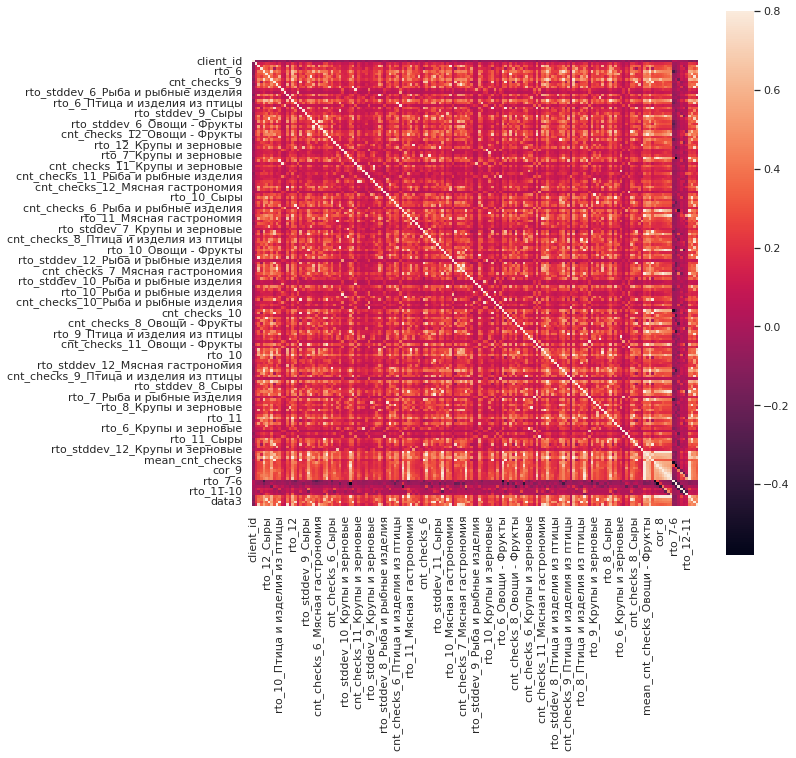

In [177]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

In [178]:
y = df_shuf['is_in_club']
features = [
    'cnt_checks_12_Овощи - Фрукты',
    'cnt_checks_11_Овощи - Фрукты',
    'cnt_checks_10_Овощи - Фрукты',
    'cnt_checks_9_Овощи - Фрукты',
    'cnt_checks_8_Овощи - Фрукты',
    'cnt_checks_7_Овощи - Фрукты',
    'cnt_checks_6_Овощи - Фрукты',
    "data1",
    'rto_12',
    'rto_11',
    'rto_10',
    'rto_9',
    'rto_8',
    'rto_7',
    'rto_6',
    'cnt_checks_12_Сыры',
    'cnt_checks_11_Сыры',
    'cnt_checks_10_Сыры',
    'cnt_checks_9_Сыры',
    'cnt_checks_8_Сыры',
    'cnt_checks_7_Сыры',
    'cnt_checks_6_Сыры',
    'data2',
    'data3',
    'data4',
    "mean_rto_Овощи - Фрукты",
    "mean_cnt_checks_Овощи - Фрукты",
    "mean_rto",
    "mean_cnt_checks",
]


n = 1
for i in range(n):
    train_x, val_x, train_y, val_y = df_shuf[features], df[features], df_shuf['is_in_club'], df['is_in_club']
  
    predictions = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
  
    model = KNeighborsClassifier()
    model.fit(train_x, train_y)
    print(f"KNN\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")

    model = DecisionTreeClassifier()
    model.fit(train_x, train_y)
    print(f"\nДерево решений\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")

    model = RandomForestClassifier()
    model.fit(train_x, train_y)
    print(f"\nСлучайный лес\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")

    model = LogisticRegression()
    model.fit(train_x, train_y)
    print(f"\nЛогистическая\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")

    model = GaussianNB()
    model.fit(train_x, train_y)
    print(f"\nБайес\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")

    model = LinearSVC()
    model.fit(train_x, train_y)
    print(f"\nВекторы\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")
    
    model = CatBoostClassifier()
    model.fit(train_x, train_y)
    print(f"\nCat\nPrecision = {precision_score(model.predict(val_x), val_y, pos_label=1)}\nRecall = {recall_score(model.predict(val_x), val_y, pos_label=1)}\nF1 = {f1_score(model.predict(val_x), val_y, pos_label=1)}")
    
    #model = XGBClassifier()
    #model.fit(train_x, train_y)
    #predictions[8] = model.predict(val_x)
    #score = precision_score(predictions[8], val_y, pos_label=1)
    #res[8] += score
  
    #model = LGBMClassifier()
    #model.fit(train_x, train_y)
    #predictions[9] = model.predict(val_x)
    #score = precision_score(predictions[9], val_y, pos_label=1)
    #res[9] += score
  
    #predictions[0] = np.round((predictions[1]+predictions[2]+predictions[3]+predictions[4]+predictions[5]+
    #                 predictions[6]+predictions[7]) / 7).astype(int)
    #res[0] += precision_score(predictions[0], val_y, pos_label=1)

"""print('Ансамбль', res[0]/n)
print('KNN', res[1]/n)
print('Деревья решений', res[2]/n)
print('Случайный лес', res[3]/n)
print('Логистическая регрессия', res[4]/n)
print('Наивный метод Байеса', res[5]/n)
print('Метод опорных векторов', res[6]/n)
print('CatBoost', res[7]/n)
#print('XGB', res[8]/n)
#print('LGBM', res[9]/n)"""

KNN
Precision = 0.6584454409566517
Recall = 0.02741047260508385
F1 = 0.052630006869978194

Дерево решений
Precision = 0.5874439461883408
Recall = 0.024091954022988506
F1 = 0.04628566381061744

Случайный лес
Precision = 0.7428998505231689
Recall = 0.031168668276316203
F1 = 0.059827259321676846

Логистическая
Precision = 0.6853512705530643
Recall = 0.03386137882648351
F1 = 0.0645342904394947

Байес
Precision = 0.5254110612855007
Recall = 0.036278253689751266
F1 = 0.06787024522108516

Векторы
Precision = 0.6771300448430493
Recall = 0.03485151561778735
F1 = 0.06629106607155923
Learning rate set to 0.033658
0:	learn: 0.6895236	total: 128ms	remaining: 2m 7s
1:	learn: 0.6860949	total: 141ms	remaining: 1m 10s
2:	learn: 0.6827434	total: 155ms	remaining: 51.5s
3:	learn: 0.6798878	total: 168ms	remaining: 41.8s
4:	learn: 0.6770299	total: 180ms	remaining: 35.9s
5:	learn: 0.6742296	total: 193ms	remaining: 32s
6:	learn: 0.6717209	total: 206ms	remaining: 29.2s
7:	learn: 0.6691881	total: 220ms	remainin

174:	learn: 0.6061069	total: 914ms	remaining: 4.31s
175:	learn: 0.6058878	total: 918ms	remaining: 4.3s
176:	learn: 0.6057743	total: 922ms	remaining: 4.29s
177:	learn: 0.6056651	total: 926ms	remaining: 4.27s
178:	learn: 0.6055091	total: 930ms	remaining: 4.26s
179:	learn: 0.6054107	total: 934ms	remaining: 4.25s
180:	learn: 0.6053315	total: 939ms	remaining: 4.25s
181:	learn: 0.6051586	total: 943ms	remaining: 4.24s
182:	learn: 0.6050656	total: 947ms	remaining: 4.23s
183:	learn: 0.6049327	total: 951ms	remaining: 4.22s
184:	learn: 0.6048037	total: 956ms	remaining: 4.21s
185:	learn: 0.6046740	total: 961ms	remaining: 4.21s
186:	learn: 0.6046145	total: 965ms	remaining: 4.19s
187:	learn: 0.6045055	total: 969ms	remaining: 4.18s
188:	learn: 0.6044224	total: 972ms	remaining: 4.17s
189:	learn: 0.6043723	total: 976ms	remaining: 4.16s
190:	learn: 0.6042593	total: 980ms	remaining: 4.15s
191:	learn: 0.6040666	total: 984ms	remaining: 4.14s
192:	learn: 0.6039668	total: 988ms	remaining: 4.13s
193:	learn: 0

373:	learn: 0.5803661	total: 1.69s	remaining: 2.83s
374:	learn: 0.5802317	total: 1.69s	remaining: 2.82s
375:	learn: 0.5801227	total: 1.7s	remaining: 2.82s
376:	learn: 0.5800099	total: 1.7s	remaining: 2.81s
377:	learn: 0.5798567	total: 1.71s	remaining: 2.81s
378:	learn: 0.5797427	total: 1.71s	remaining: 2.8s
379:	learn: 0.5796623	total: 1.72s	remaining: 2.8s
380:	learn: 0.5795109	total: 1.72s	remaining: 2.8s
381:	learn: 0.5793678	total: 1.73s	remaining: 2.79s
382:	learn: 0.5792236	total: 1.73s	remaining: 2.79s
383:	learn: 0.5790795	total: 1.73s	remaining: 2.78s
384:	learn: 0.5789376	total: 1.74s	remaining: 2.78s
385:	learn: 0.5787873	total: 1.74s	remaining: 2.77s
386:	learn: 0.5786896	total: 1.75s	remaining: 2.77s
387:	learn: 0.5785541	total: 1.75s	remaining: 2.76s
388:	learn: 0.5783900	total: 1.75s	remaining: 2.76s
389:	learn: 0.5782461	total: 1.76s	remaining: 2.75s
390:	learn: 0.5781103	total: 1.76s	remaining: 2.75s
391:	learn: 0.5780064	total: 1.77s	remaining: 2.74s
392:	learn: 0.577

573:	learn: 0.5549103	total: 2.47s	remaining: 1.83s
574:	learn: 0.5547869	total: 2.47s	remaining: 1.83s
575:	learn: 0.5546605	total: 2.48s	remaining: 1.82s
576:	learn: 0.5545290	total: 2.48s	remaining: 1.82s
577:	learn: 0.5543926	total: 2.49s	remaining: 1.81s
578:	learn: 0.5542871	total: 2.49s	remaining: 1.81s
579:	learn: 0.5541216	total: 2.5s	remaining: 1.81s
580:	learn: 0.5540302	total: 2.5s	remaining: 1.8s
581:	learn: 0.5539298	total: 2.5s	remaining: 1.8s
582:	learn: 0.5538039	total: 2.51s	remaining: 1.79s
583:	learn: 0.5536822	total: 2.51s	remaining: 1.79s
584:	learn: 0.5535742	total: 2.52s	remaining: 1.78s
585:	learn: 0.5533963	total: 2.52s	remaining: 1.78s
586:	learn: 0.5533119	total: 2.52s	remaining: 1.77s
587:	learn: 0.5532056	total: 2.53s	remaining: 1.77s
588:	learn: 0.5530559	total: 2.53s	remaining: 1.77s
589:	learn: 0.5528529	total: 2.54s	remaining: 1.76s
590:	learn: 0.5527544	total: 2.54s	remaining: 1.76s
591:	learn: 0.5526351	total: 2.54s	remaining: 1.75s
592:	learn: 0.552

772:	learn: 0.5311904	total: 3.24s	remaining: 952ms
773:	learn: 0.5310761	total: 3.25s	remaining: 948ms
774:	learn: 0.5309502	total: 3.25s	remaining: 944ms
775:	learn: 0.5308239	total: 3.25s	remaining: 939ms
776:	learn: 0.5307142	total: 3.26s	remaining: 935ms
777:	learn: 0.5305508	total: 3.26s	remaining: 931ms
778:	learn: 0.5304822	total: 3.27s	remaining: 927ms
779:	learn: 0.5303345	total: 3.27s	remaining: 923ms
780:	learn: 0.5302767	total: 3.27s	remaining: 919ms
781:	learn: 0.5301392	total: 3.28s	remaining: 915ms
782:	learn: 0.5300219	total: 3.29s	remaining: 911ms
783:	learn: 0.5298643	total: 3.29s	remaining: 906ms
784:	learn: 0.5297234	total: 3.29s	remaining: 902ms
785:	learn: 0.5296594	total: 3.3s	remaining: 898ms
786:	learn: 0.5295241	total: 3.3s	remaining: 893ms
787:	learn: 0.5293904	total: 3.3s	remaining: 889ms
788:	learn: 0.5292928	total: 3.31s	remaining: 885ms
789:	learn: 0.5292287	total: 3.31s	remaining: 880ms
790:	learn: 0.5290873	total: 3.32s	remaining: 876ms
791:	learn: 0.5

973:	learn: 0.5096234	total: 4.02s	remaining: 107ms
974:	learn: 0.5094456	total: 4.03s	remaining: 103ms
975:	learn: 0.5093812	total: 4.04s	remaining: 99.3ms
976:	learn: 0.5092651	total: 4.04s	remaining: 95.1ms
977:	learn: 0.5091712	total: 4.04s	remaining: 91ms
978:	learn: 0.5090051	total: 4.05s	remaining: 86.9ms
979:	learn: 0.5088364	total: 4.05s	remaining: 82.7ms
980:	learn: 0.5087538	total: 4.06s	remaining: 78.6ms
981:	learn: 0.5086571	total: 4.06s	remaining: 74.5ms
982:	learn: 0.5085162	total: 4.07s	remaining: 70.3ms
983:	learn: 0.5083807	total: 4.07s	remaining: 66.2ms
984:	learn: 0.5082684	total: 4.08s	remaining: 62.1ms
985:	learn: 0.5081808	total: 4.08s	remaining: 57.9ms
986:	learn: 0.5080357	total: 4.08s	remaining: 53.8ms
987:	learn: 0.5079537	total: 4.09s	remaining: 49.6ms
988:	learn: 0.5078924	total: 4.09s	remaining: 45.5ms
989:	learn: 0.5077667	total: 4.09s	remaining: 41.4ms
990:	learn: 0.5076550	total: 4.1s	remaining: 37.2ms
991:	learn: 0.5075055	total: 4.1s	remaining: 33.1ms

"print('Ансамбль', res[0]/n)\nprint('KNN', res[1]/n)\nprint('Деревья решений', res[2]/n)\nprint('Случайный лес', res[3]/n)\nprint('Логистическая регрессия', res[4]/n)\nprint('Наивный метод Байеса', res[5]/n)\nprint('Метод опорных векторов', res[6]/n)\nprint('CatBoost', res[7]/n)\n#print('XGB', res[8]/n)\n#print('LGBM', res[9]/n)"

In [179]:
KNN
Precision = 0.6576980568011959
Recall = 0.026880899288267097
F1 = 0.051650770359501094

Дерево решений
Precision = 0.5792227204783259
Recall = 0.023311776206948413
F1 = 0.04481970910562993

Случайный лес
Precision = 0.7698056801195815
Recall = 0.03126802465013206
F1 = 0.06009510195746668

Логистическая
Precision = 0.7092675635276532
Recall = 0.03514554477446115
F1 = 0.06697247706422017

Байес
Precision = 0.5508221225710015
Recall = 0.037546487340159966
F1 = 0.07030094911050698

Векторы
Precision = 0.6995515695067265
Recall = 0.03552451798998026
F1 = 0.06761540128584845

Cat
Precision = 0.7742899850523169
Recall = 0.03186221743810549
F1 = 0.06120580155377662

SyntaxError: invalid syntax (1587590302.py, line 6)

In [ ]:
KNN
Precision = 0.6778774289985052
Recall = 0.027739547970761842
F1 = 0.05329807551050389

Дерево решений
Precision = 0.593423019431988
Recall = 0.02373550161425326
F1 = 0.04564530037367059

Случайный лес
Precision = 0.7481315396113603
Recall = 0.030140616060943662
F1 = 0.057946684419230655

Логистическая
Precision = 0.7010463378176383
Recall = 0.03458192007078602
F1 = 0.06591244466305951

Байес
Precision = 0.5411061285500748
Recall = 0.0369576314446146
F1 = 0.06918960244648319

Векторы
Precision = 0.6920777279521674
Recall = 0.03527350297120219
F1 = 0.06712577020659659

Cat
Precision = 0.7608370702541106
Recall = 0.031106765263093566
F1 = 0.059769844997651485

In [ ]:
KNN
Precision = 0.6584454409566517
Recall = 0.02741047260508385
F1 = 0.052630006869978194

Дерево решений
Precision = 0.5874439461883408
Recall = 0.024091954022988506
F1 = 0.04628566381061744

Случайный лес
Precision = 0.7428998505231689
Recall = 0.031168668276316203
F1 = 0.059827259321676846

Логистическая
Precision = 0.6853512705530643
Recall = 0.03386137882648351
F1 = 0.0645342904394947

Байес
Precision = 0.5254110612855007
Recall = 0.036278253689751266
F1 = 0.06787024522108516

Векторы
Precision = 0.6771300448430493
Recall = 0.03485151561778735
F1 = 0.06629106607155923

Cat
Precision = 0.7406576980568012
Recall = 0.031221448599603036
F1 = 0.05991716799177726